# APPM 5370 Homework 6

## Soroush Khadem

In [1]:
import numpy as np
from scipy.integrate import odeint
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')
import math

In [2]:
horiz_scaling = 3 # scale plots to fill page, so must adjust the phase plane plots as well
height = 5

plt.rcParams['figure.figsize'] = [height*horiz_scaling, height]

### Problem 4: Training the NOT AND Function With a Two Layer Network

The network will have inputs $x_1$ and $x_2$ with a single hidden layer containing two neurons:
$$
y_1 = f(w_{11}x_1 + w_{12}x_2 + \theta_1)
$$
$$
y_2 = f(w_{21}x_1 + w_{22}x_2 + \theta_2)
$$
$$
z = f(J_1y_1 + J_2y_2 + \eta)
$$
The loss function is given as:
$$
E = (z-z_{\text{targ}})^2
$$

We will use a sigmoid activation for $f(x)$. The partial derivatives for each parameter can be found using the chain rule:

$$
\frac{\partial E}{\partial w_{11}} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_1} \frac{\partial y_1}{\partial w_{11}} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot J_1\cdot f'(w_{11} x_1 + w_{12} x_2 + \theta_1)\cdot x_1
$$

$$
\frac{\partial E}{\partial w_{12}} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_1} \frac{\partial y_1}{\partial w_{12}} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot J_1\cdot f'(w_{11} x_1 + w_{12} x_2 + \theta_1)\cdot x_2
$$

$$
\frac{\partial E}{\partial w_{21}} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_2} \frac{\partial y_2}{\partial w_{21}} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot J_2\cdot f'(w_{21} x_1 + w_{22} x_2 + \theta_1)\cdot x_1
$$

$$
\frac{\partial E}{\partial w_{22}} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_2} \frac{\partial y_2}{\partial w_{22}} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot J_2\cdot f'(w_{21} x_1 + w_{22} x_2 + \theta_1)\cdot x_2 
$$

$$
\frac{\partial E}{\partial J_1} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial J_1} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot y_1
$$

$$
\frac{\partial E}{\partial J_2} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial J_2} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot y_2
$$

$$
\frac{\partial E}{\partial \theta_1} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_1} \frac{\partial y_1}{\partial \theta_1} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot J_1\cdot f'(w_{11} x_1 + w_{12} x_2 + \theta_1)
$$

$$
\frac{\partial E}{\partial \theta_2} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_2} \frac{\partial y_2}{\partial \theta_2} = 2(z-z_{targ})\cdot f'(J_1 y_1 + J_2 y_2 + \eta)\cdot J_1\cdot f'(w_{21} x_1 + w_{22} x_2 + \theta_2)
$$
$$
\frac{\partial E}{\partial \theta_3} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial \theta_3} = 2(z-z_{targ}) f'(J_1 y_1 + J_2 y_2 + \theta_3)
$$

In [3]:
def f(x):
    return 1/(1+np.exp(-x))

In [4]:
def fp(x):
    return np.exp(-x)/(1+np.exp(-x))**2

For the "soft" NOT AND function, the following inputs and targets are used:
$$
x_1 = x_2 = 0 \rightarrow z_{\text{targ}} = 0.95
$$
$$
x_1 = x_2 = 1 \rightarrow z_{\text{targ}} = 0.05
$$
$$
x_1 = 1, x_2 = 0 \rightarrow z_{\text{targ}} = 0.95
$$
$$
x_1 = 0, x_2 = 1 \rightarrow z_{\text{targ}} = 0.95
$$

#### Part A

We will use a learning rate of 0.5, 10000 iterations, and an error threshold of 0.05

In [11]:
def z_target(x1, x2):
    if x1 == 1 and x2 == 1:
        return 0.05
    return 0.95

In [12]:
def train_net(r, errthresh, maxiter):
    # randomize weights and bias
    w11 = rnd.uniform(-1,1,1)
    w12 = rnd.uniform(-1,1,1)
    w21 = rnd.uniform(-1,1,1)
    w22 = rnd.uniform(-1,1,1)
    J1 = rnd.uniform(-1,1,1)
    J2 = rnd.uniform(-1,1,1)
    theta1 = rnd.uniform(-1,1,1)
    theta2 = rnd.uniform(-1,1,1)
    eta = rnd.uniform(-1,1,1)

    inputs = [[0,0], [0,1], [1,0], [1,1]]

    errvec = []
    for i in range(maxiter):
        maxerr = -np.infty
        for x1, x2 in inputs:
            y1 = f(w11*x1 + w12*x2 + theta1)
            y2 = f(w21*x1 + w22*x2 + theta2)
            z = f(J1*y1 + J2*y2 + eta)

            zt = z_target(x1, x2)
            err = (z - zt)**2
            maxerr = max(err, maxerr)

            # backpropagate based on observed error
            w11_new = w11 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * J1 * fp(w11*x1 + w12*x2 + theta1) * x1
            w12_new = w12 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * J1 * fp(w11*x1 + w12*x2 + theta1) * x2
            w21_new = w21 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * J2 * fp(w21*x1 + w22*x2 + theta2) * x1
            w22_new = w22 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * J2 * fp(w21*x1 + w22*x2 + theta2) * x2
            J1_new = J1 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * y1
            J2_new = J2 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * y2
            theta1_new = theta1 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * J1 * fp(w11*x1 + w12*x2 + theta1)
            theta2_new = theta2 - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta) * J2 * fp(w21*x1 + w22*x2 + theta2)
            eta_new = eta - r * 2*(z - zt) * fp(J1*y1 + J2*y2 + eta)

            w11 = w11_new
            w12 = w12_new
            w21 = w21_new
            w22 = w22_new
            J1 = J1_new
            J2 = J2_new
            theta1 = theta1_new
            theta2 = theta2_new
            eta = eta_new


        if maxerr < errthresh:
            break
        errvec.append(maxerr)
        
    return errvec

In [13]:
def plot_err(errvec, lr):
    fig = plt.figure()
    plt.grid(True, alpha=0.2)
    plt.semilogy(np.arange(len(errvec)), errvec)
    plt.title('Learning soft NOT AND, lr=%s'%lr)
    plt.xlabel('Iteration')
    plt.ylabel('Max Error')

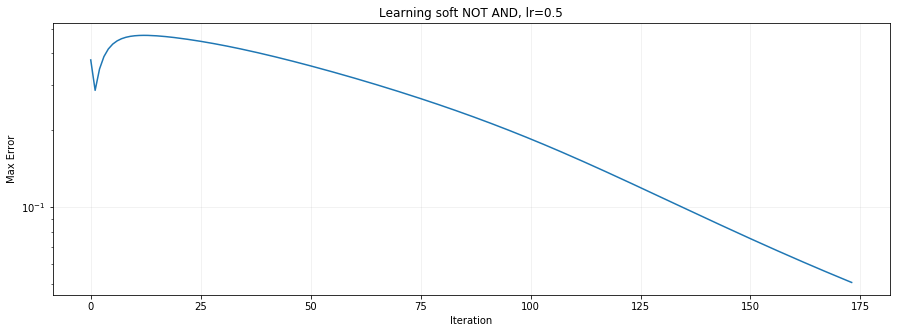

In [14]:
# set hyperparams
r = 0.5
errthresh = 0.05
maxiter = 10000

# train and plot
err = train_net(r, errthresh, maxiter)
plot_err(err, r)

The error doesn't always decrease, but after many trials has a very similar curve each time. The initial increase is an artifact of overshooting or missing the direction to descend in parameter space.

#### Part B: Tuning Learning Rate Hyperparameter

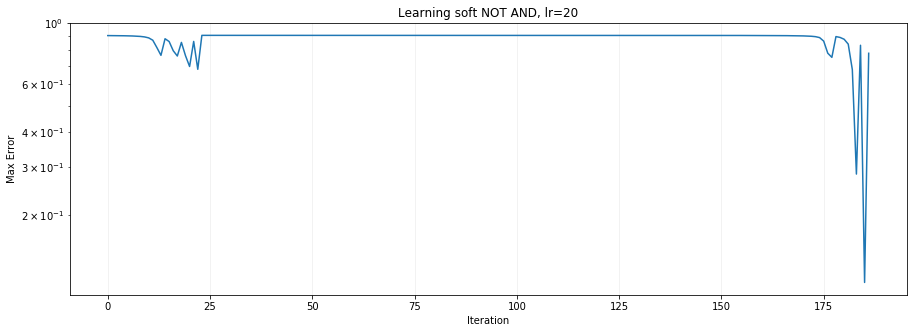

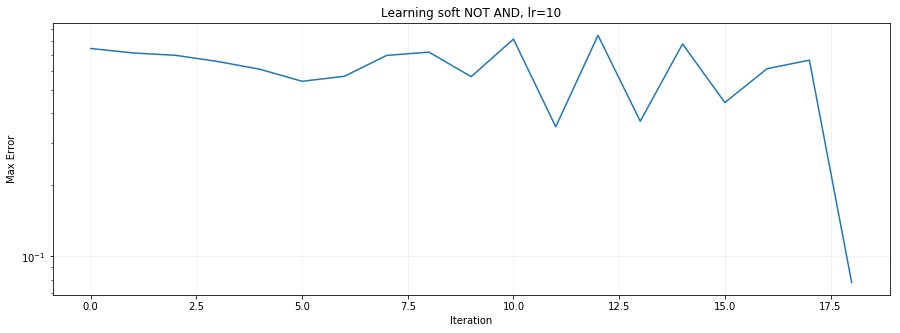

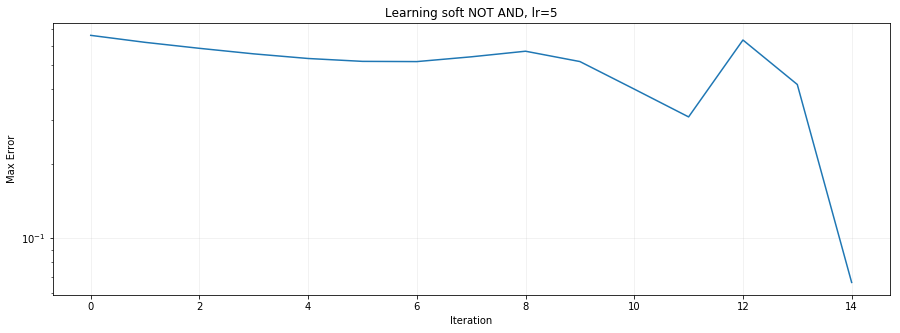

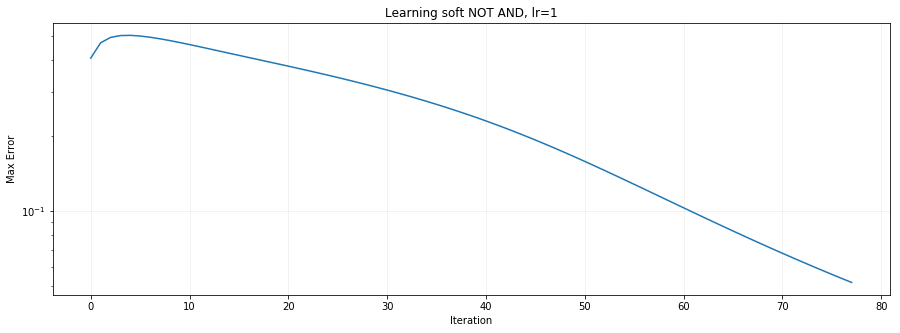

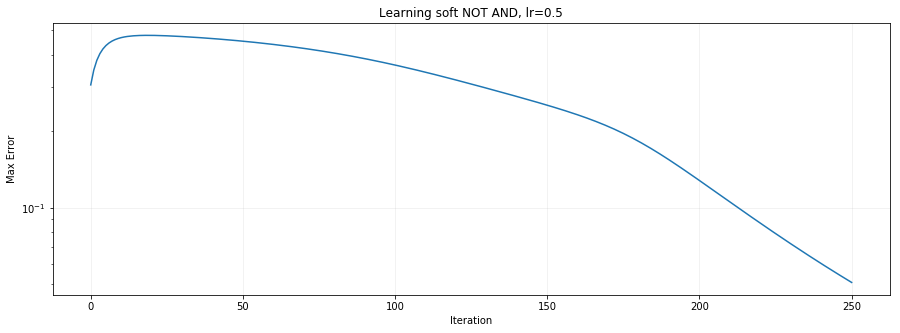

In [15]:
rs = [20, 10, 5, 1, 0.5]
errthresh = 0.05
maxiter = 10000
num_iterations = []
for r in rs:
    curr_num_iterations = []
    for i in range(10):
        err = train_net(r, errthresh, maxiter)
        curr_num_iterations.append(len(err))
    
    # just plot last one
    plot_err(err, r)
    
    # keep track of mean num. iterations to reach error thresh
    num_iterations.append(np.mean(curr_num_iterations))

In [16]:
num_iterations

[8389.7, 20.6, 19.2, 87.0, 164.8]

On average, the learning rate of 5 is optimal. This is most likely due to the fact that a higher learning rate may not reach the error threshold, since it could overshoot the minumim value for the loss and never return. For example, the learning rate of 20 usually never convereged, since the update is so large it wouldn't reach the minimal error value. In order for the network to converge more rapidly, a different activation, such as a rectified linear function could be used, since its slope is greater than the sigmoid's.